In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/Taller_diseño_proyecto/data_academic_performance.xlsx"
df_raw = pd.read_excel(path)
df_raw

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,FRESH,PHONE,MOBILE,REVENUE,JOB,SCHOOL_NAME,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,Cod_SPro,UNIVERSITY,ACADEMIC_PROGRAM,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,NaN,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Between 1 and less than 2 LMMW,No,COL NUEVO CAMBRIDGE,PRIVATE,ACADEMIC,71,81,61,86,82,EK201830142293,UNIVERSIDAD DE SANTANDER - UDES-BUCARAMANGA,INDUSTRIAL ENGINEERING,71,93,71,93,79,181,180,91,5,4,2,2
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10 or more LMMW,No,COL LA QUINTA DEL PUENTE,PRIVATE,ACADEMIC,83,75,66,100,88,EK201830002633,UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.,INDUSTRIAL ENGINEERING,97,38,86,98,78,201,182,92,5,4,4,4
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,NaN,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",CENT EDUC PAULO FREIRE ...,PRIVATE,ACADEMIC,52,49,38,46,42,EK201830196510,UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNA...,ELECTRONIC ENGINEERING,17,1,18,43,22,113,113,7,1,1,1,1
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,NaN,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Between 2 and less than 3 LMMW,No,LICEO ANDINO,PRIVATE,ACADEMIC,56,55,51,64,73,EK201830031665,UNIVERSIDAD CATOLICA DE PEREIRA-PEREIRA,INDUSTRIAL ENGINEERING,65,35,76,80,48,137,157,67,4,3,2,2
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,NaN,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Between 7 and less than 10 LMMW,No,LIC TALLER SAN MIGUEL,PRIVATE,ACADEMIC,80,65,76,85,92,EK201830130461,UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA,INDUSTRIAL ENGINEERING,94,94,98,100,71,189,198,98,5,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,SB11201420568705,M,Ninguno,Complete Secundary,Other occupation,Auxiliary or Administrative,Stratum 2,It is not classified by the SISBEN,Six,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Between 1 and less than 2 LMMW,No,COLEGIO NUESTRA SENORA DE LAS MISERICORDIAS,PRIVATE,ACADEMIC,67,69,70,67,81,EK201830233533,UNIVERSIDAD ECCI-BOGOTÁ D.C.,MECHATRONICS ENGINEERING,88,71,86,87,65,142,176,88,5,4,2,2
12407,SB11201420573045,M,Complete professional education,Complete Secundary,Executive,Other occupation,Stratum 2,Level 2,Five,NaN,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Between 2 and less than 3 LMMW,No,COLEGIO REPUBLICA FEDERAL DE ALEMANIA (IED),PUBLIC,ACADEMIC,58,57,61,63,53,EK201830225944,INSTITUCION UNIVERSITARIA DE COLOMBIA - UNIVER...,INDUSTRIAL ENGINEERING,46,39,44,11,0,127,107,4,1,1,4,2
12408,SB11201420578809,M,Complete technique or technology,Complete technique or technology,Retired,Home,Stratum 2,Level 2,Five,NaN,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Between 3 and less than 5 LMMW,No,INSTITUTO SIGMUND FREUD,PRIVATE,ACADEMIC,66,69,75,70,58,EK201830225636,UNIVERSIDAD TECNOLOGICA DE BOLIVAR-CARTAGENA,INDUSTRIAL ENGINEERING,98,88,90,81,87,192,188,95,5,4,2,2
12409,SB11201420578812,F,Complete professional education,Complete professional education,Independent professional,Small entrepreneur,Stratum 3,It is not classified by the SISBEN,Seven,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Between 5 and less than 7 LMMW,No,INSTITUTO SIGMUND FREUD,PRIVATE,ACADEMIC,53,69,64,59,52,EK2

Como podemos ver hay columnas de atributos que no califican para Chile, como Stratum (son diferentes a los chilenos), SISBEN, Unnamed 9, DVD ya que esto es antiguo, Fresh porque no sabemos qué es, Revenue ya que está en una medida que no se comprende, school name y todas las columnas después de los puntajes.

Es por esto que se eliminan estas columnas. En el futuro algunas de ellas se podrían utilizar pero por ahora se busca generar un modelo simple, por lo que los datos deben ser genéricos.

In [ ]:
# Remove features

df = df_raw.drop(columns=['COD_S11', 'STRATUM', 'SISBEN', 'Unnamed: 9', 'DVD', 'FRESH', 'REVENUE',
                          'SCHOOL_NAME'])
df.drop(df.columns[22:], axis=1, inplace=True)
df.dropna(inplace=True)
df

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,PHONE,MOBILE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11
0,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Three,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,PRIVATE,ACADEMIC,71,81,61,86,82
1,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Three,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,PRIVATE,ACADEMIC,83,75,66,100,88
2,M,Not sure,Not sure,Independent,Home,Five,No,No,Yes,Yes,No,No,Yes,No,"Yes, 20 hours or more per week",PRIVATE,ACADEMIC,52,49,38,46,42
3,F,Not sure,Not sure,Other occupation,Independent,Three,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,PRIVATE,ACADEMIC,56,55,51,64,73
4,M,Complete professional education,Complete professional education,Executive,Home,One,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,PRIVATE,ACADEMIC,80,65,76,85,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,M,Ninguno,Complete Secundary,Other occupation,Auxiliary or Administrative,Six,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,PRIVATE,ACADEMIC,67,69,70,67,81
12407,M,Complete professional education,Complete Secundary,Executive,Other occupation,Five,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,PUBLIC,ACADEMIC,58,57,61,63,53
12408,M,Complete technique or technology,Complete technique or technology,Retired,Home,Five,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,PRIVATE,ACADEMIC,66,69,75,70,58
12409,F,Complete professional education,Complete professional education,Independent professional,Small entrepreneur,Seven,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,PRIVATE,ACADEMIC,53,69,64,59,52


## Data Exploration: Features

### Gender

M: 7368 , F: 5043


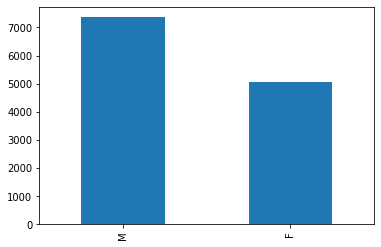

In [ ]:
# Gender distribution
df['GENDER'].value_counts().plot(kind='bar')

def count_male_female(df):
  return len(df[df['GENDER'] == 'M']), len(df[df['GENDER'] == 'F'])

print('M:', count_male_female(df)[0], ", F:", count_male_female(df)[1])

Se puede ver claramente que se tienen más datos de alumnos hombres que mujeres. Es más, se tiene un exceso mayor a 2300 muestras.

### Parental Education

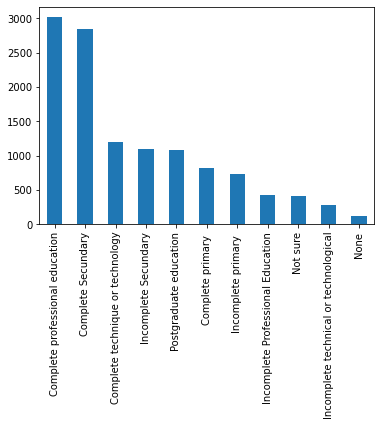

In [ ]:
# Father education distribution

df.loc[df['EDU_FATHER'] == "Ninguno", "EDU_FATHER"] = "None"
# We asumme 0 is no answer, so we drop it
df.drop(df.loc[df['EDU_FATHER'] == 0].index, inplace=True)

df['EDU_FATHER'].value_counts().plot(kind='bar')

Se puede ver que la mayoría de los datos muestran padres con educación secundaria completa.

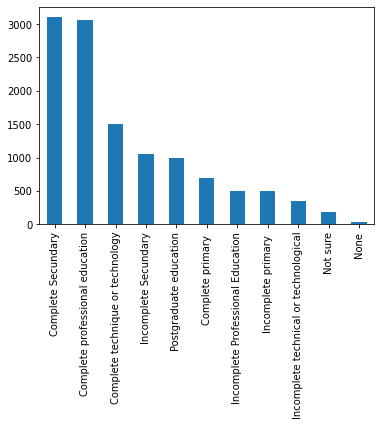

In [ ]:
# Mother education distribution

df.loc[df['EDU_MOTHER'] == "Ninguno", "EDU_MOTHER"] = "None"
# We asumme 0 is no answer, so we drop it
df.drop(df.loc[df['EDU_MOTHER'] == 0].index, inplace=True)

df['EDU_MOTHER'].value_counts().plot(kind='bar')

Las madres de los alumnos de los datos, también en su mayoría cuentan con educación secundaria completa.

### Parental occupation

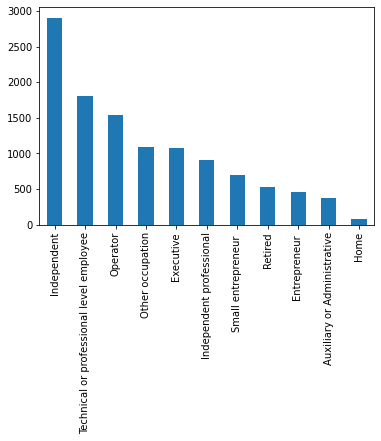

In [ ]:
# Father occupation distribution
df.drop(df.loc[df['OCC_FATHER'] == 0].index, inplace=True)

df['OCC_FATHER'].value_counts().plot(kind='bar')

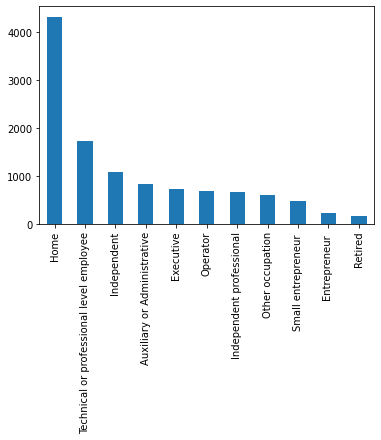

In [ ]:
# Mother occupation distribution
df.drop(df.loc[df['OCC_MOTHER'] == 0].index, inplace=True)

df['OCC_MOTHER'].value_counts().plot(kind='bar')

En este caso se ve una gran diferencia en la distribución de ocupación de los padres y las madres. Donde para los hombres, la última categoría es 'Home' que significa que trabajan de forma no remunerada en el hogar, minetras que para las mujeres es la ocupación más recurrente.

### People living in the house

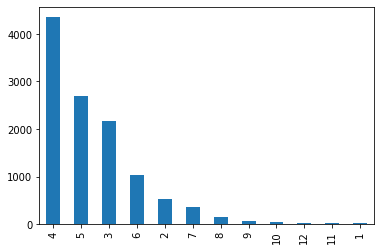

In [ ]:
dictionary = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5, 'Six': 6, 'Seven': 7, 'Eight': 8,
       'Nueve': 9, 'Ten': 10, 'Once': 11, 'Twelve or more': 12}

df.replace({'PEOPLE_HOUSE': dictionary}, inplace=True)
df['PEOPLE_HOUSE'].value_counts().plot(kind='bar')

Se puede notar que en la mayoría de las muestras hay 3 o más personas viviendo en la casa. Aún así es menos recurrente que sean más de 6 personas. Hay casos extremos en que los alumnos viven solos o con 12 personas o más.

### Internet Usage

8999 students have internet and 2450 don't


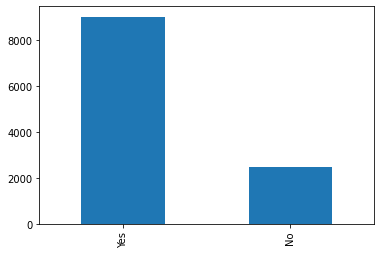

In [ ]:
df['INTERNET'].value_counts().plot(kind='bar')

def have_internet(df):
  return len(df[df['INTERNET'] == 'Yes']), len(df[df['INTERNET'] == 'No'])

print(have_internet(df)[0], "students have internet and", have_internet(df)[1], "don't")

Hay muchos más estudiantes con acceso a internet que estudiantes que no lo tienen.

### TV

9815 students have tv and 1634 don't


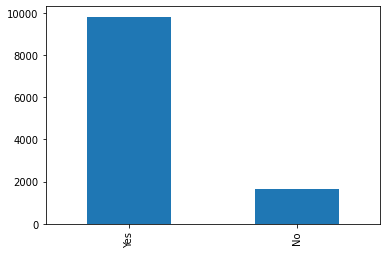

In [ ]:
df['TV'].value_counts().plot(kind='bar')

def have_tv(df):
  return len(df[df['TV'] == 'Yes']), len(df[df['TV'] == 'No'])

print(have_tv(df)[0], "students have tv and", have_tv(df)[1], "don't")

Se puede notar que también hay más estudiantes con TV que los que no tienen. Es más hay más alumnos que tienen tv que los que tienen internet.

### Washing Machine

6971 students have a washing machine and 4478 don't


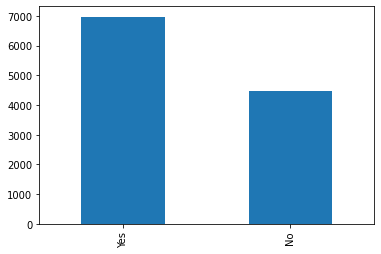

In [ ]:
# WASHING_MCH

df['WASHING_MCH'].value_counts().plot(kind='bar')

def have_wm(df):
  return len(df[df['WASHING_MCH'] == 'Yes']), len(df[df['WASHING_MCH'] == 'No'])

print(have_wm(df)[0], "students have a washing machine and", have_wm(df)[1], "don't")

En este caso la diferencia de alumnos no es tan abismal como con la televisión o el internet.

### Microwave oven

8006 students have a microwave and 3443 don't


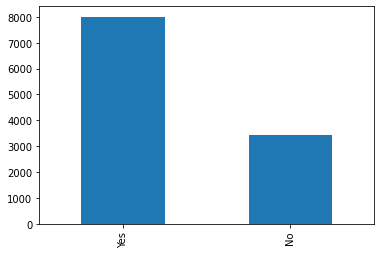

In [ ]:
# MIC_OVEN

df['MIC_OVEN'].value_counts().plot(kind='bar')

def have_mo(df):
  return len(df[df['MIC_OVEN'] == 'Yes']), len(df[df['MIC_OVEN'] == 'No'])

print(have_mo(df)[0], "students have a microwave and", have_mo(df)[1], "don't")

Nuevamente se nota que hay más alumnos que cuentan con microondas que los que no tienen.

### Car

5321 students have a car and 6128 don't


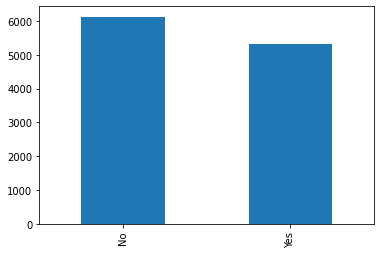

In [ ]:
df['CAR'].value_counts().plot(kind='bar')

def have_car(df):
  return len(df[df['CAR'] == 'Yes']), len(df[df['CAR'] == 'No'])

print(have_car(df)[0], "students have a car and", have_car(df)[1], "don't")

En este caso, se nota que hay más alumnos que no cuentan con un auto que los que sí tienen.

### Landline

10988 students have a landline and 461 don't


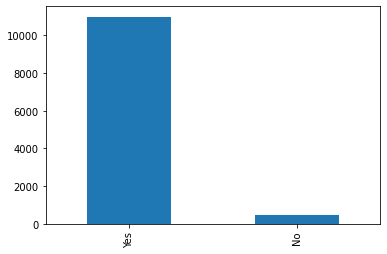

In [ ]:
df['PHONE'].value_counts().plot(kind='bar')

def have_phone(df):
  return len(df[df['PHONE'] == 'Yes']), len(df[df['PHONE'] == 'No'])

print(have_phone(df)[0], "students have a landline and", have_phone(df)[1], "don't")

Casi todos los estudiantes cuentan con teléfono fijo

### Cell phone

8134 students have a cell phone and 3315 don't


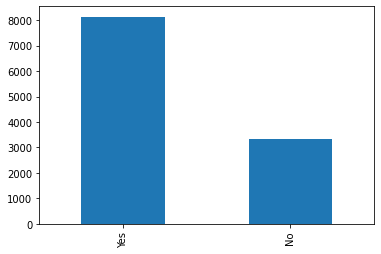

In [ ]:
df['MOBILE'].value_counts().plot(kind='bar')

def have_cell(df):
  return len(df[df['MOBILE'] == 'Yes']), len(df[df['MOBILE'] == 'No'])

print(have_cell(df)[0], "students have a cell phone and", have_cell(df)[1], "don't")

Nuevamnete,la mayor parte de los estudiante cuenta con un celular.

### Job

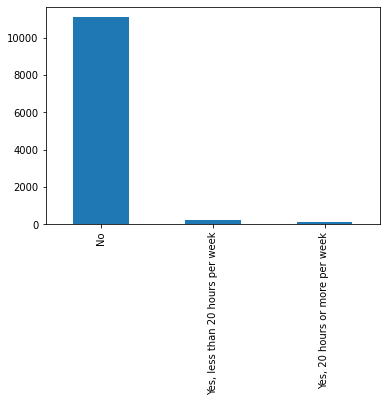

In [ ]:
df.drop(df.loc[df['JOB'] == 0].index, inplace=True)

df['JOB'].value_counts().plot(kind='bar')

En estos datos, la mayoría de los alumnos no tienen trabajo, pero pocos casos en que trabajan menos de 20 horas y son aún más escasos los que trabajan más de 20 horas.

### Private or public school

5936 students go to priivate school and 5509 go to public school


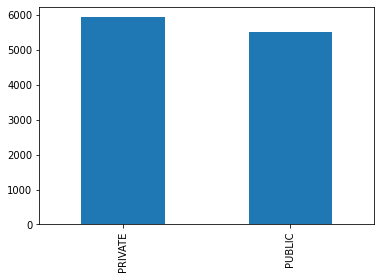

In [ ]:
# SCHOOL_NAT

df['SCHOOL_NAT'].value_counts().plot(kind='bar')

def private_or_public(df):
  return len(df[df['SCHOOL_NAT'] == 'PRIVATE']), len(df[df['SCHOOL_NAT'] == 'PUBLIC'])

print(private_or_public(df)[0], 'students go to priivate school and', private_or_public(df)[1], 'go to public school')

Hay una mayor cantidad de alumnos que asisten a instituciones privadas, pero aún así la distribución es muy similar.

### Type of school

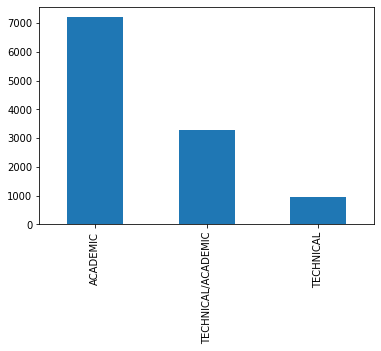

In [ ]:
# SCHOOL_TYPE

df.drop(df.loc[df['SCHOOL_TYPE'] == 'Not apply'].index, inplace=True)

df['SCHOOL_TYPE'].value_counts().plot(kind='bar')

Por otra parte, los datos contienen una mayor muestra de instituciones académicos

## Data Exploration: Targets

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

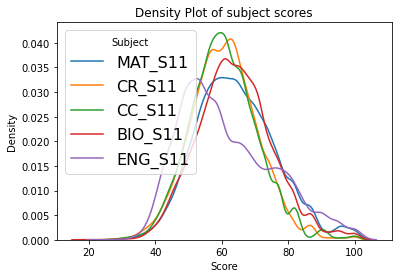

In [ ]:
subjects = ['MAT_S11', 'CR_S11', 'CC_S11', 'BIO_S11', 'ENG_S11']

for s in subjects:
  sub = df[s]
  sns.distplot(sub, hist = False, kde = True, label = s)

plt.legend(prop={'size': 16}, title = 'Subject')
plt.title('Density Plot of subject scores')
plt.xlabel('Score')
plt.ylabel('Density')

Se puede ver que existen asignaturas en que tiende a haber un mejor resultado en estos datos, como biología, mientras que el peor promedio de notas se tiene en inglés, que corresponde a la segunda lengua enseñada.